# BIG MART SALES PREDICTION

# Exploratory Data Analysis

Importing Libraries for EDA

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

Importing the dataset

In [2]:
df_train=pd.read_csv('Bigdatamart_Train.csv')
df_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
df_test=pd.read_csv('Bigdatamart_Test.csv')
df_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [4]:
df_train.shape

(8523, 12)

The train dataset contains 8523 rows and 12 columns

In [5]:
df_test.shape

(5681, 11)

The test dataset contains 5681 rows and 11 columns

Information about the features

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [7]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


# Missing Values

In [8]:
df_train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

<AxesSubplot:>

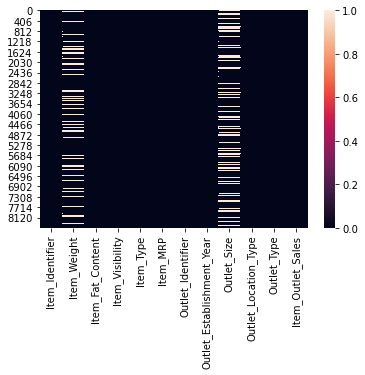

In [9]:
sns.heatmap(df_train.isnull())

HEATMAP SHOWS Item_Weight AND Outlet_Size HAVE MISSING VALUES.

In [10]:
df_test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

<AxesSubplot:>

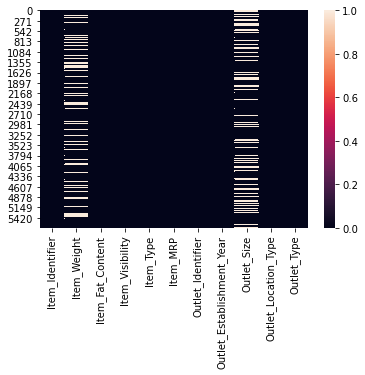

In [11]:
sns.heatmap(df_test.isnull())

# Statistical Summary

In [12]:
df_train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


MEAN VALUES IS LESS THAN 75TH PERCENTILE IN EVERY COLUMN. MAXIMUM VALUE OF Item_Outlet_Sales IS VERY HIGH THAN 75TH PERCENTILE 
INDICATING PRESENCE OF OUTLIERS. MINIMUM VALUE OF Item_Visibility IS ZERO.

In [13]:
df_train['source']='train'
df_test['source']='test'
df=pd.concat([df_train,df_test],ignore_index=True)

In [14]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train


In [15]:
df.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
14199,FDB58,10.5,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN,test
14200,FDD47,7.6,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,NaN,test
14201,NCO17,10.0,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1,NaN,test
14202,FDJ26,15.3,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1,NaN,test
14203,FDU37,9.5,Regular,0.104720,Canned,79.7960,OUT045,2002,NaN,Tier 2,Supermarket Type1,NaN,test


In [16]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

In [17]:
df.shape

(14204, 13)

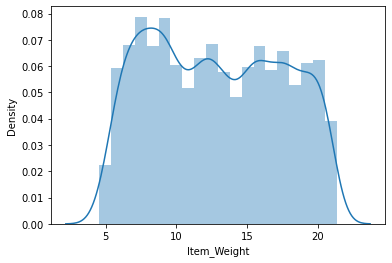

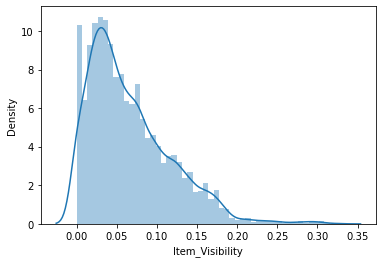

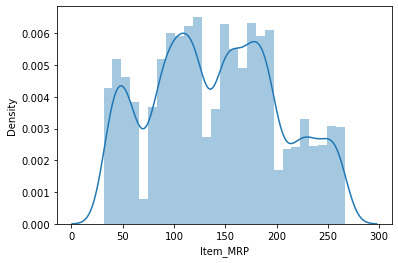

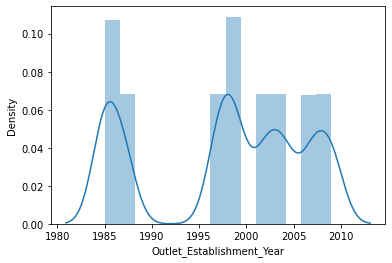

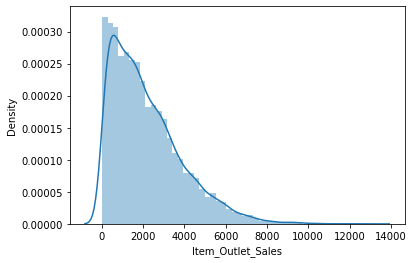

In [18]:
for i in df_train.describe().columns:
    sns.distplot(df_train[i].dropna())
    plt.show()

Item_Visibility IS RIGHT SKEWED. MOST OF ITEMS HAVE LESS VISIBILITY.
Item_Outlet_Sales IS ALSO RIGHT SKEWED.SALES IS MOSTLY AROUND 0 TO 7000

# Box Plots showing outliers

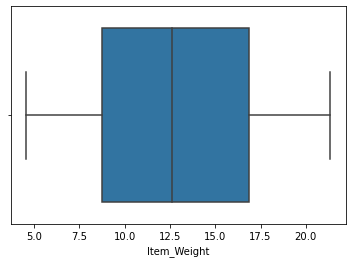

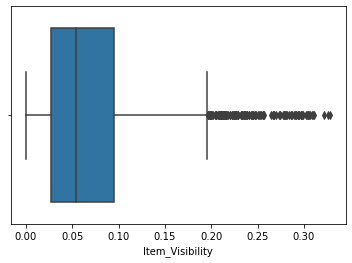

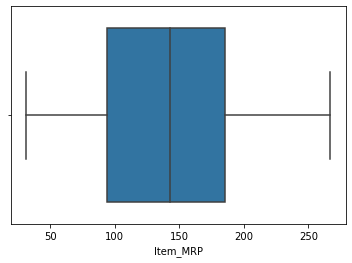

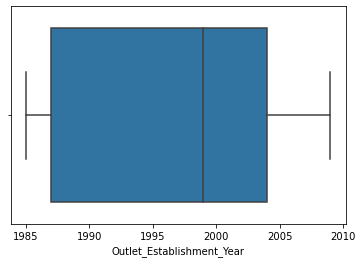

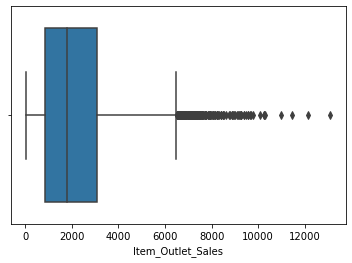

In [19]:
for i in df_train.describe().columns:
    sns.boxplot(df_train[i].dropna())
    plt.show()

Item_Visibilty AND Item_Outlet_Sales CONTAINS OUTLIERS.

COUNTPLOT OF ALL FEATURES

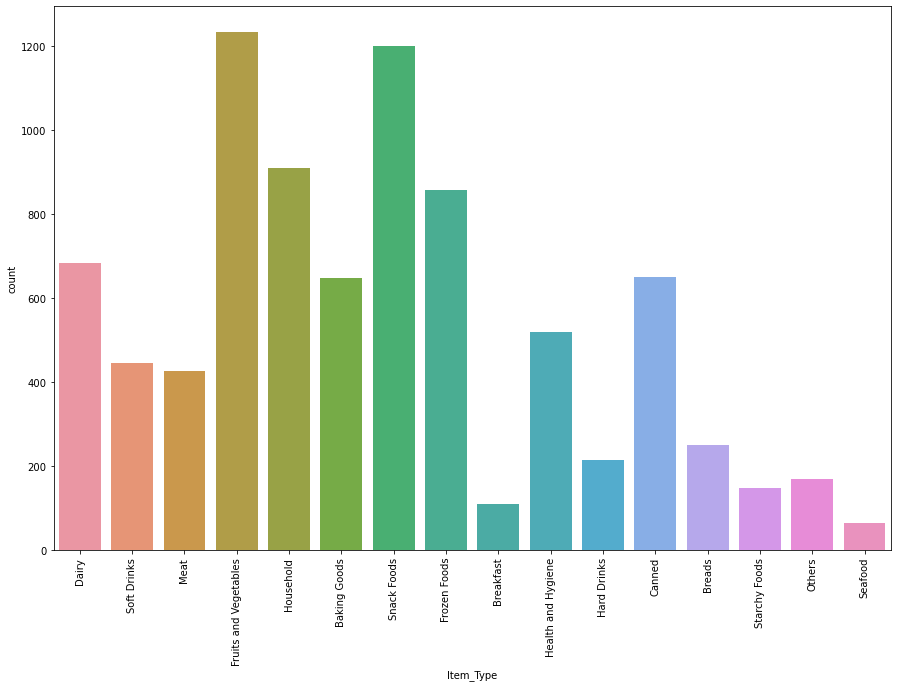

In [20]:
plt.figure(figsize=(15,10))
sns.countplot(df_train.Item_Type)
plt.xticks(rotation=90);

Fruits and Vegetable HAVE HIGHEST COUNT FOLLOWED BY Snack Foods AND LOWEST COUNT IS OF SEAFOOD

In [21]:
df_train.Item_Type.value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

# Distribution for Outlet_Size

<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

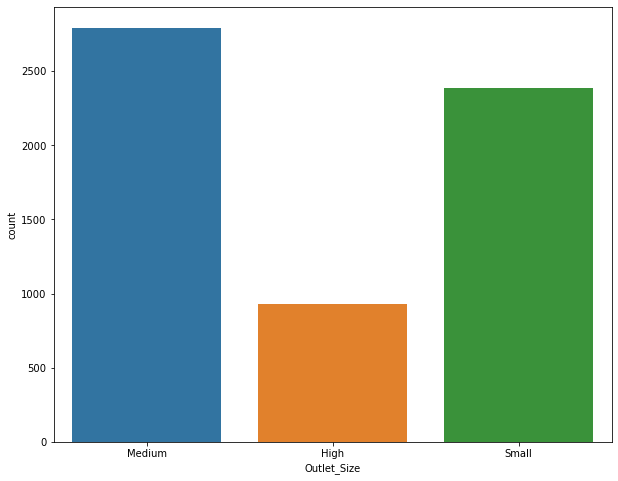

In [22]:
plt.figure(figsize=(10,8))
sns.countplot(df_train.Outlet_Size)

COUNT OF Medium Outlet_Size IS MAXIMUM AND COUNT OF High Outlet_Size IS MINIMUM.

In [23]:
df_train.Outlet_Size.value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='count'>

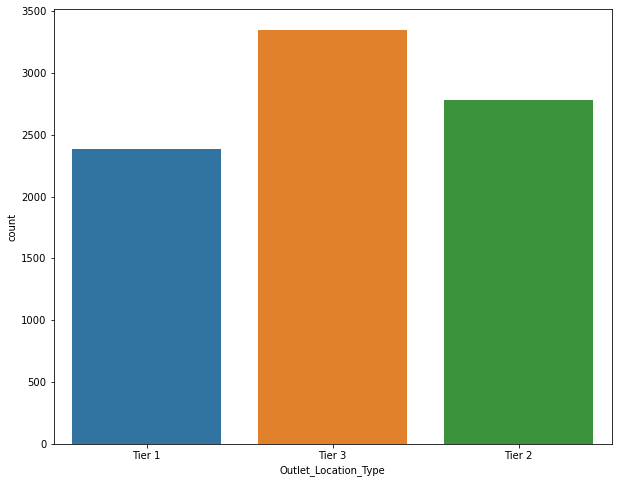

In [24]:
plt.figure(figsize=(10,8))
sns.countplot(df_train.Outlet_Location_Type)

COUNT OF Tier 3 Outlet_Location_Type IS MAXIMUM AND IS MINIMUM FOR Tier 1.

In [25]:
df_train.Outlet_Location_Type.value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

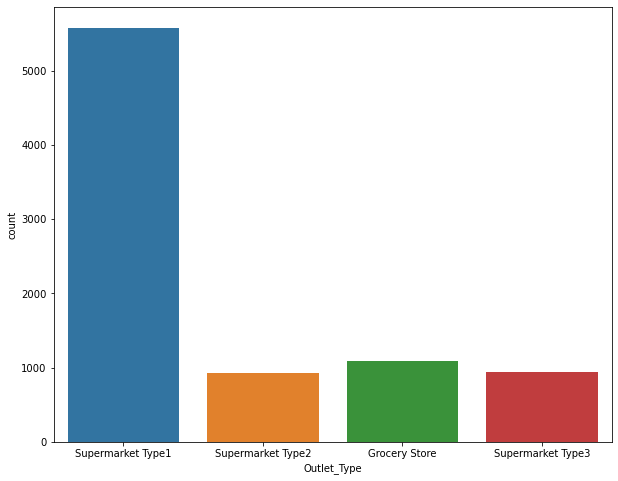

In [26]:
plt.figure(figsize=(10,8))
sns.countplot(df_train.Outlet_Type)
plt.xticks(rotation=0);

COUNT OF Supermarket Type1 IS MAXIMUM. Supermarket Type 2 AND Supermarket Type 3 HAVE NEARLY EQUAL COUNT.

In [27]:
df_train.Outlet_Type.value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

# REMOVING OUTLIERS

In [28]:
def boxoutlier(var):
    for x in var.iloc[:,3:4].columns :        
        Q1=var[x].quantile(0.25)
        Q3=var[x].quantile(0.75)
        IQR=Q3-Q1
        Lower = Q1-(1.5*IQR)
        Upper = Q3+(1.5*IQR)
        var.loc[:,x]=np.where(var[x].values > Upper,Upper,var[x].values)
        var.loc[:,x]=np.where(var[x].values < Lower,Lower,var[x].values)
        
    return var
df=boxoutlier(df)

<AxesSubplot:>

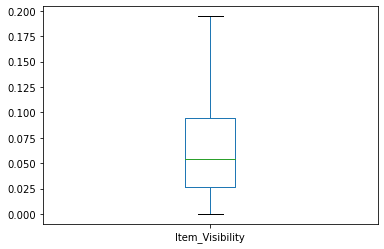

In [29]:
df['Item_Visibility'].plot.box()

# FEATURE ENGINEERING

In [30]:
df['Item_Fat_Content']=df['Item_Fat_Content'].replace({'LF':'Low Fat','reg':'Regular','low fat':'Low Fat'})

In [31]:
df['Item_Fat_Content'].value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

In [32]:
df_train['Item_Fat_Content']=df_train['Item_Fat_Content'].replace({'LF':'Low Fat','reg':'Regular','low fat':'Low Fat'})

In [33]:
df_train['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

# CHECKING CORRELATION

In [34]:
df_train.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014048,0.027141,-0.011588,0.014123
Item_Visibility,-0.014048,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.027141,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.011588,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.014123,-0.128625,0.567574,-0.049135,1.000000


<AxesSubplot:>

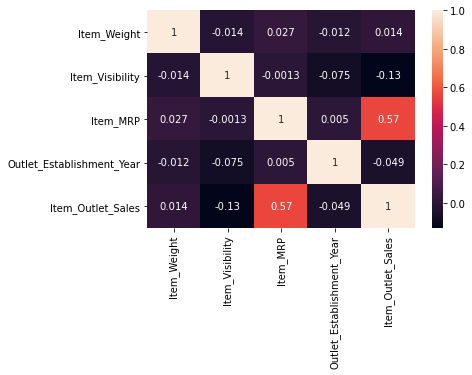

In [35]:
sns.heatmap(df_train.corr(),annot=True)

HIGHEST CORRELATION IS BETWEEN Item_MRP AND Item_Outlet_Sales.

# Treating Null Values

In [36]:
df['Item_Weight'].fillna(df['Item_Weight'].mean(),inplace=True)

In [37]:
df['Outlet_Size'].value_counts()

Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

In [38]:
df['Outlet_Size'].fillna('Medium',inplace=True)

In [39]:
df['Outlet_Establishment_Year'].value_counts()

1985    2439
1987    1553
1999    1550
1997    1550
2004    1550
2002    1548
2009    1546
2007    1543
1998     925
Name: Outlet_Establishment_Year, dtype: int64

In [40]:
df['Outlet_Years']=2010-df['Outlet_Establishment_Year']
df['Outlet_Years'].describe()

count    14204.000000
mean        12.169319
std          8.371664
min          1.000000
25%          6.000000
50%         11.000000
75%         23.000000
max         25.000000
Name: Outlet_Years, dtype: float64

In [41]:
df['Item_Type'].value_counts()

Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

In [42]:
df['Item_Identifier'].value_counts()

FDX46    10
FDA52    10
FDZ48    10
FDK38    10
FDT31    10
         ..
FDM10     7
FDM52     7
NCL42     7
DRN11     7
NCW54     7
Name: Item_Identifier, Length: 1559, dtype: int64

In [43]:
#changing only the first 2 characters
df['New_Item_type']=df['Item_Identifier'].apply(lambda x:x[0:2])

In [44]:
df['New_Item_type']=df['New_Item_type'].map({'FD':'Food','NC':'Non-consumable','DR':'Drinks'})

In [45]:
df['New_Item_type'].value_counts()

Food              10201
Non-consumable     2686
Drinks             1317
Name: New_Item_type, dtype: int64

# Encoding

In [46]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
df['Outlet']=label.fit_transform(df['Outlet_Identifier'])
varib=['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','New_Item_type','Outlet_Type','Outlet']
for i in varib:
    df[i]=label.fit_transform(df[i])
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Outlet_Years,New_Item_type,Outlet
0,FDA15,9.30,0,0.016047,Dairy,249.8092,OUT049,1999,1,0,1,3735.1380,train,11,1,9
1,DRC01,5.92,1,0.019278,Soft Drinks,48.2692,OUT018,2009,1,2,2,443.4228,train,1,0,3
2,FDN15,17.50,0,0.016760,Meat,141.6180,OUT049,1999,1,0,1,2097.2700,train,11,1,9
3,FDX07,19.20,1,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,1,2,0,732.3800,train,12,1,0
4,NCD19,8.93,0,0.000000,Household,53.8614,OUT013,1987,0,2,1,994.7052,train,23,2,1


In [47]:
df=pd.get_dummies(df,columns=['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','New_Item_type','Outlet_Type','Outlet'])
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Item_Outlet_Sales            float64
source                        object
Outlet_Years                   int64
Item_Fat_Content_0             uint8
Item_Fat_Content_1             uint8
Outlet_Location_Type_0         uint8
Outlet_Location_Type_1         uint8
Outlet_Location_Type_2         uint8
Outlet_Size_0                  uint8
Outlet_Size_1                  uint8
Outlet_Size_2                  uint8
New_Item_type_0                uint8
New_Item_type_1                uint8
New_Item_type_2                uint8
Outlet_Type_0                  uint8
Outlet_Type_1                  uint8
Outlet_Type_2                  uint8
Outlet_Type_3                  uint8
Outlet_0                       uint8
Outlet_1                       uint8
O

In [48]:
df.drop(columns=["Item_Identifier","Outlet_Identifier",'Item_Type','Outlet_Establishment_Year'],inplace=True)

In [49]:
df_train=df.loc[df["source"]=="train"]
df_test=df.loc[df["source"]=="test"]
df_test.reset_index(drop=True,inplace=True)
print(df_train.columns)
print(df_test.columns)

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales',
       'source', 'Outlet_Years', 'Item_Fat_Content_0', 'Item_Fat_Content_1',
       'Outlet_Location_Type_0', 'Outlet_Location_Type_1',
       'Outlet_Location_Type_2', 'Outlet_Size_0', 'Outlet_Size_1',
       'Outlet_Size_2', 'New_Item_type_0', 'New_Item_type_1',
       'New_Item_type_2', 'Outlet_Type_0', 'Outlet_Type_1', 'Outlet_Type_2',
       'Outlet_Type_3', 'Outlet_0', 'Outlet_1', 'Outlet_2', 'Outlet_3',
       'Outlet_4', 'Outlet_5', 'Outlet_6', 'Outlet_7', 'Outlet_8', 'Outlet_9'],
      dtype='object')
Index(['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales',
       'source', 'Outlet_Years', 'Item_Fat_Content_0', 'Item_Fat_Content_1',
       'Outlet_Location_Type_0', 'Outlet_Location_Type_1',
       'Outlet_Location_Type_2', 'Outlet_Size_0', 'Outlet_Size_1',
       'Outlet_Size_2', 'New_Item_type_0', 'New_Item_type_1',
       'New_Item_type_2', 'Outlet_Type_0', 'Outlet_Type_1', 'Outlet_Typ

In [50]:
df_test.drop(columns=["Item_Outlet_Sales"],inplace=True)

In [51]:
df_train.drop(columns=["source"],inplace=True)
df_test.drop(columns=["source"],inplace=True)

In [52]:
df_x=df_train.drop(columns=["Item_Outlet_Sales"])
y=df_train[["Item_Outlet_Sales"]]

# Scaling

In [53]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(df_x)
x=pd.DataFrame(x,columns=df_x.columns)

# Finding the best random state

In [54]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
lr=LinearRegression()
for i in range (0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    print(f"At random state{i},the training accuracy is:{r2_score(y_train,pred_train)}")
    print(f"At random state{i},the testing accuracy is:{r2_score(y_test,pred_test)}")
    print("\n")

At random state0,the training accuracy is:0.5627911958310601
At random state0,the testing accuracy is:0.5632952939301097


At random state1,the training accuracy is:0.5607190846189705
At random state1,the testing accuracy is:0.5685506006009755


At random state2,the training accuracy is:0.5624057478767563
At random state2,the testing accuracy is:0.5622549613167096


At random state3,the training accuracy is:0.5579186993931327
At random state3,the testing accuracy is:0.5757374848534649


At random state4,the training accuracy is:0.5686089425293395
At random state4,the testing accuracy is:0.5476403563258593


At random state5,the training accuracy is:0.5678366545413042
At random state5,the testing accuracy is:0.5520278102954554


At random state6,the training accuracy is:0.5657650501369622
At random state6,the testing accuracy is:0.5549373264792428


At random state7,the training accuracy is:0.5686793675958379
At random state7,the testing accuracy is:0.5504681279900672


At random state8

# Train Test Split

In [55]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=80)

# Model Building

In [56]:
lm=LinearRegression()
lm.fit(x_train,y_train)

LinearRegression()

In [57]:
lm.score(x_train,y_train)

0.5549126297375899

In [58]:
pred=lm.predict(x_test)
print("Predicted Sales:",pred)
print("Actual Sales:",y_test)

Predicted Sales: [[2241.83865162]
 [3607.83865162]
 [ 861.83865162]
 ...
 [1805.83865162]
 [-968.16134838]
 [4013.83865162]]
Actual Sales:       Item_Outlet_Sales
2374          1384.1982
6856          2526.7110
2398          1364.8900
1183           792.3020
270           1428.1410
...                 ...
3896           622.5230
1615          3511.4292
6467          2603.2780
7641           123.8388
1774          3787.0704

[2557 rows x 1 columns]


# R2 SCORE

In [59]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score
print("r2 Score:",r2_score(y_test,pred))
print("Error:")
print("Mean Absolute Error:",mean_absolute_error(y_test,pred))
print("Mean Squared Error:",mean_squared_error(y_test,pred))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test,pred)))

r2 Score: 0.5815755182373252
Error:
Mean Absolute Error: 816.4942039367343
Mean Squared Error: 1173323.159256608
Root Mean Squared Error: 1083.200424324422


# CROSS VALIDATION

In [60]:
from sklearn.model_selection import cross_val_score
lrs=cross_val_score(lm,x,y,scoring='r2',cv=5)
print(lrs)
print('LinearRegression cross_val_score:',lrs.mean())

[0.57029713 0.55582607 0.54767488 0.56557172 0.56510258]
LinearRegression cross_val_score: 0.560894476750458


# PLOT OF LINEAR REGRESSION

<function matplotlib.pyplot.show(close=None, block=None)>

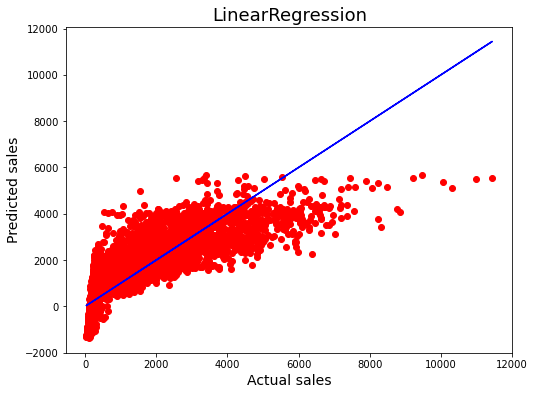

In [61]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual sales',fontsize=14)
plt.ylabel('Predicted sales',fontsize=14)
plt.title('LinearRegression',fontsize=18)
plt.show

# REGULARISATION

In [62]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
parameters={'alpha':[.0001,.001,.01,.1,10],'random_state':list(range(0,10))}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'alpha': 10, 'random_state': 0}


In [63]:
ls=Lasso(alpha=10, random_state=0)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)
pred_ls=ls.predict(x_test)
lss=r2_score(y_test,pred_ls)
lss

0.5826187949752011

# ENSEMBLE METHOD

In [64]:
! pip install xgboost --user

In [66]:
from xgboost import XGBRegressor
model=XGBRegressor(n_estimators=1000,learning_rate=0.05)
model.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.05, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=1000, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [67]:
y_pred=model.predict(x_test)
y_pred

array([2670.0034 , 3360.8127 ,  603.32794, ..., 1715.7826 ,  501.08502,
       4142.1113 ], dtype=float32)

In [68]:
model.score(x_train,y_train)*100

90.11467013760635

# SAVING THE MODEL

In [69]:
import pickle
filename='Sales1.pkl'
pickle.dump(lm,open(filename,'wb'))